In [1]:
import os
os.getcwd()

'D:\\Stock_Data'

In [7]:
pip install alpha_vantage

  Using cached alpha_vantage-2.3.1-py3-none-any.whl (31 kB)
     -------------------------------------- 319.8/319.8 KB 6.6 MB/s eta 0:00:00
  Using cached aiosignal-1.3.1-py3-none-any.whl (7.6 kB)
     ---------------------------------------- 60.9/60.9 KB ? eta 0:00:00
  Using cached async_timeout-4.0.2-py3-none-any.whl (5.8 kB)
Note: you may need to restart the kernel to use updated packages.


You should consider upgrading via the 'C:\Users\Dell\AppData\Local\Programs\Python\Python310\python.exe -m pip install --upgrade pip' command.


In [9]:
pip install pandas

     --------------------------------------- 10.7/10.7 MB 13.9 MB/s eta 0:00:00
     --------------------------------------- 14.8/14.8 MB 17.3 MB/s eta 0:00:00
     ------------------------------------- 341.8/341.8 KB 20.7 MB/s eta 0:00:00
     ------------------------------------- 502.3/502.3 KB 15.9 MB/s eta 0:00:00
Note: you may need to restart the kernel to use updated packages.


You should consider upgrading via the 'C:\Users\Dell\AppData\Local\Programs\Python\Python310\python.exe -m pip install --upgrade pip' command.


In [3]:
from alpha_vantage.timeseries import TimeSeries
import pandas as pd

# Set the API key and symbol
key = 'M2C4VCS7F9SLM3U7'
symbol = 'AAPL'

# Create a TimeSeries object and retrieve the daily stock data
ts = TimeSeries(key=key, output_format='pandas')
data, meta_data = ts.get_daily_adjusted(symbol=symbol)

# Print the first 5 rows of the data
print(data.head())

            1. open   2. high  3. low  4. close  5. adjusted close   
date                                                                 
2023-04-27  165.190  168.5600  165.19    168.41             168.41  \
2023-04-26  163.055  165.2800  162.80    163.76             163.76   
2023-04-25  165.190  166.3050  163.73    163.77             163.77   
2023-04-24  165.000  165.6000  163.89    165.33             165.33   
2023-04-21  165.050  166.4521  164.49    165.02             165.02   

             6. volume  7. dividend amount  8. split coefficient  
date                                                              
2023-04-27  64902329.0                 0.0                   1.0  
2023-04-26  44105745.0                 0.0                   1.0  
2023-04-25  48714063.0                 0.0                   1.0  
2023-04-24  41949581.0                 0.0                   1.0  
2023-04-21  58337341.0                 0.0                   1.0  


In [4]:
print(data)
print(data.info())

            1. open   2. high  3. low  4. close  5. adjusted close   
date                                                                 
2023-04-27  165.190  168.5600  165.19    168.41         168.410000  \
2023-04-26  163.055  165.2800  162.80    163.76         163.760000   
2023-04-25  165.190  166.3050  163.73    163.77         163.770000   
2023-04-24  165.000  165.6000  163.89    165.33         165.330000   
2023-04-21  165.050  166.4521  164.49    165.02         165.020000   
...             ...       ...     ...       ...                ...   
2022-12-08  142.360  143.5200  141.10    142.65         142.433063   
2022-12-07  142.190  143.3700  140.00    140.94         140.725664   
2022-12-06  147.075  147.3000  141.92    142.91         142.692668   
2022-12-05  147.770  150.9199  145.77    146.63         146.407011   
2022-12-02  145.960  148.0000  145.65    147.81         147.585216   

             6. volume  7. dividend amount  8. split coefficient  
date                  

In [5]:
pip install matplotlib

     ---------------------------------------- 7.6/7.6 MB 9.2 MB/s eta 0:00:00
     -------------------------------------- 163.0/163.0 KB 4.8 MB/s eta 0:00:00
     ---------------------------------------- 2.5/2.5 MB 16.0 MB/s eta 0:00:00
     ---------------------------------------- 1.0/1.0 MB 12.8 MB/s eta 0:00:00
     ---------------------------------------- 55.3/55.3 KB ? eta 0:00:00
Note: you may need to restart the kernel to use updated packages.


You should consider upgrading via the 'C:\Users\Dell\AppData\Local\Programs\Python\Python310\python.exe -m pip install --upgrade pip' command.


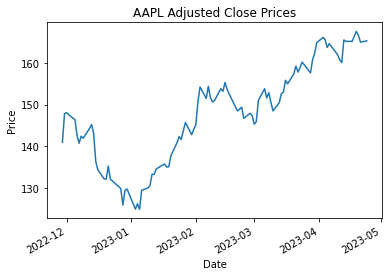

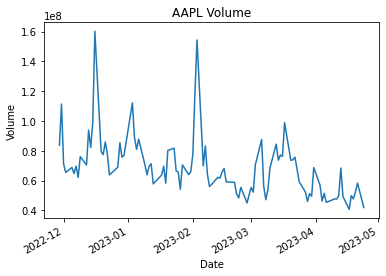

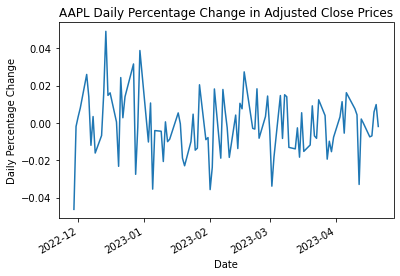

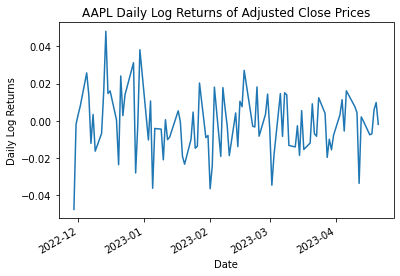

In [3]:
import matplotlib.pyplot as plt

# Plot the adjusted close prices
data['5. adjusted close'].plot()
plt.title('AAPL Adjusted Close Prices')
plt.xlabel('Date')
plt.ylabel('Price')
plt.show()

# Plot the volume
data['6. volume'].plot()
plt.title('AAPL Volume')
plt.xlabel('Date')
plt.ylabel('Volume')
plt.show()

# Plot the daily percentage change in adjusted close prices
data['5. adjusted close'].pct_change().plot()
plt.title('AAPL Daily Percentage Change in Adjusted Close Prices')
plt.xlabel('Date')
plt.ylabel('Daily Percentage Change')
plt.show()

# Plot the daily log returns of adjusted close prices
import numpy as np

log_returns = np.log(data['5. adjusted close']).diff()
log_returns.plot()
plt.title('AAPL Daily Log Returns of Adjusted Close Prices')
plt.xlabel('Date')
plt.ylabel('Daily Log Returns')
plt.show()


In [6]:
# Calculate the mean and median adjusted close prices
mean_price = data['5. adjusted close'].mean()
median_price = data['5. adjusted close'].median()

print(f"Mean price: {mean_price}")
print(f"Median price: {median_price}")


Mean price: 147.92445331261573
Median price: 148.49


In [7]:
pip install scikit-learn

     ---------------------------------------- 8.3/8.3 MB 15.6 MB/s eta 0:00:00
     --------------------------------------- 42.5/42.5 MB 12.4 MB/s eta 0:00:00
     -------------------------------------- 298.0/298.0 KB 6.3 MB/s eta 0:00:00
Note: you may need to restart the kernel to use updated packages.


You should consider upgrading via the 'C:\Users\Dell\AppData\Local\Programs\Python\Python310\python.exe -m pip install --upgrade pip' command.


In [8]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error

# Split the data into training and testing sets
train_data = data.iloc[:-30]   # Use all but the last 30 days for training
test_data = data.iloc[-30:]    # Use the last 30 days for testing

# Train a linear regression model
X_train = train_data.index.astype('datetime64[ns]').astype('int64').values.reshape(-1, 1)
y_train = train_data['5. adjusted close'].values.reshape(-1, 1)

regressor = LinearRegression()
regressor.fit(X_train, y_train)

# Make predictions on the testing set
X_test = test_data.index.astype('datetime64[ns]').astype('int64').values.reshape(-1, 1)
y_test = test_data['5. adjusted close'].values.reshape(-1, 1)

y_pred = regressor.predict(X_test)

# Evaluate the model performance using mean squared error
mse = mean_squared_error(y_test, y_pred)
print(f"Mean squared error: {mse}")


Mean squared error: 129.30847704314925


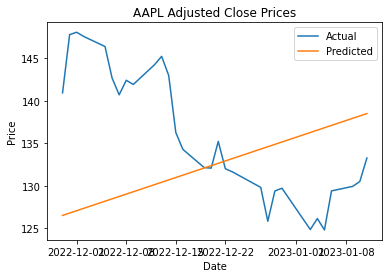

In [10]:
import matplotlib.pyplot as plt

# Make predictions on the last 30 days of data
X_new = data.iloc[-30:].index.astype('datetime64[ns]').astype('int64').values.reshape(-1, 1)
y_new = regressor.predict(X_new)

# Plot the actual and predicted adjusted close prices
plt.plot(data.index[-30:], test_data['5. adjusted close'], label='Actual')
plt.plot(data.index[-30:], y_new, label='Predicted')
plt.title('AAPL Adjusted Close Prices')
plt.xlabel('Date')
plt.ylabel('Price')
plt.legend()
plt.show()


In [3]:
pip install keras

Note: you may need to restart the kernel to use updated packages.


You should consider upgrading via the 'C:\Users\Dell\AppData\Local\Programs\Python\Python310\python.exe -m pip install --upgrade pip' command.


In [4]:
pip install tensorflow

Note: you may need to restart the kernel to use updated packages.


You should consider upgrading via the 'C:\Users\Dell\AppData\Local\Programs\Python\Python310\python.exe -m pip install --upgrade pip' command.


     -------------------------------------- 272.8/272.8 MB 6.0 MB/s eta 0:00:00
     ---------------------------------------- 65.5/65.5 KB 3.5 MB/s eta 0:00:00
     ------------------------------------- 420.6/420.6 KB 13.2 MB/s eta 0:00:00
     --------------------------------------- 24.4/24.4 MB 19.8 MB/s eta 0:00:00
     ---------------------------------------- 1.2/1.2 MB 19.5 MB/s eta 0:00:00
  Installing build dependencies: started
  Installing build dependencies: finished with status 'done'
  Getting requirements to build wheel: started
  Getting requirements to build wheel: finished with status 'done'
  Preparing metadata (pyproject.toml): started
  Preparing metadata (pyproject.toml): finished with status 'done'
     -------------------------------------- 126.5/126.5 KB 7.3 MB/s eta 0:00:00
     ---------------------------------------- 4.1/4.1 MB 15.4 MB/s eta 0:00:00
     ---------------------------------------- 2.6/2.6 MB 18.7 MB/s eta 0:00:00
     ----------------------------

In [8]:
import numpy as np
from sklearn.preprocessing import MinMaxScaler
from keras.models import Sequential
from keras.layers import Dense, LSTM


# Prepare the data
target_variable = '5. adjusted close'
input_features = ['6. volume']
target_data = data[target_variable].values.reshape(-1, 1)
input_data = data[input_features].values
scaler = MinMaxScaler()
scaled_input_data = scaler.fit_transform(input_data)
n_steps = 30
X = []
y = []
for i in range(n_steps, len(scaled_input_data)):
    X.append(scaled_input_data[i-n_steps:i, :])
    y.append(target_data[i])
X = np.array(X)
y = np.array(y)

# Split the data into training and testing sets
split_index = int(0.8 * len(X))
X_train, X_test = X[:split_index], X[split_index:]
y_train, y_test = y[:split_index], y[split_index:]

# Define the model architecture
model = Sequential()
model.add(LSTM(50, return_sequences=True, input_shape=(n_steps, 1)))
model.add(LSTM(50, return_sequences=True))
model.add(LSTM(50))
model.add(Dense(1))

# Compile the model
model.compile(optimizer='adam', loss='mse')

# Train the model
model.fit(X_train, y_train, epochs=50, batch_size=32)

# Evaluate the model on the test set
test_loss = model.evaluate(X_test, y_test)
print('Test loss:', test_loss)


Epoch 1/50
2/2 [==============================] - 4s 60ms/step - loss: 20556.1133
Epoch 2/50
2/2 [==============================] - 0s 23ms/step - loss: 20534.1699
Epoch 3/50
2/2 [==============================] - 0s 23ms/step - loss: 20502.9375
Epoch 4/50
2/2 [==============================] - 0s 26ms/step - loss: 20453.1621
Epoch 5/50
2/2 [==============================] - 0s 23ms/step - loss: 20368.7617
Epoch 6/50
2/2 [==============================] - 0s 36ms/step - loss: 20226.3711
Epoch 7/50
2/2 [==============================] - 0s 27ms/step - loss: 20016.2520
Epoch 8/50
2/2 [==============================] - 0s 39ms/step - loss: 19775.6836
Epoch 9/50
2/2 [==============================] - 0s 30ms/step - loss: 19554.9902
Epoch 10/50
2/2 [==============================] - 0s 26ms/step - loss: 19369.8613
Epoch 11/50
2/2 [==============================] - 0s 28ms/step - loss: 19199.2500
Epoch 12/50
2/2 [==============================] - 0s 24ms/step - loss: 19036.1738
Epoch 13/50
2

1/1 [==============================] - 1s 778ms/step


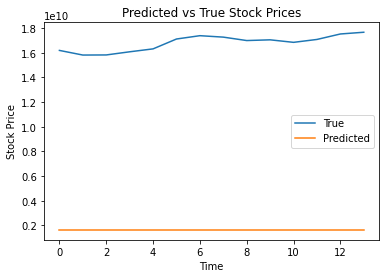

In [9]:
# Generate predictions for the test set
y_pred = model.predict(X_test)

# Inverse transform the predictions and true values to their original scale
y_pred = scaler.inverse_transform(y_pred)
y_test = scaler.inverse_transform(y_test)

# Plot the predicted and true values
plt.plot(y_test, label='True')
plt.plot(y_pred, label='Predicted')
plt.xlabel('Time')
plt.ylabel('Stock Price')
plt.title('Predicted vs True Stock Prices')
plt.legend()
plt.show()


In [9]:
import numpy as np
new_data = np.random.rand(100, 30, 1)  # Generate a random array of shape (100, 30, 1)
model.predict(new_data)
test_data = np.random.rand(50, 30, 1)  # Generate a random array of shape (50, 30, 1)
test_labels = np.random.randint(2, size=(50,))  # Generate random binary labels for the test data
model.evaluate(test_data, test_labels)


2/2 [==============================] - 2s 10ms/step - loss: 173.4813


173.48126220703125

In [5]:
from sklearn.tree import DecisionTreeRegressor
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error

# Split the data into training and testing sets
X = data.iloc[:, :-1].values # Features
y = data.iloc[:, -1].values # Target variable
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

# Create the decision tree regressor
regressor = DecisionTreeRegressor(random_state=0)

# Train the model using the training data
regressor.fit(X_train, y_train)

# Predict the stock prices for the next month
last_month_data = data.tail(30)
next_month_features = last_month_data.iloc[:, :-1].values
next_month_predictions = regressor.predict(next_month_features)

# Evaluate the model using the testing data
y_pred = regressor.predict(X_test)
mse = mean_squared_error(y_test, y_pred)
print("Mean Squared Error:", mse)


Mean Squared Error: 0.0


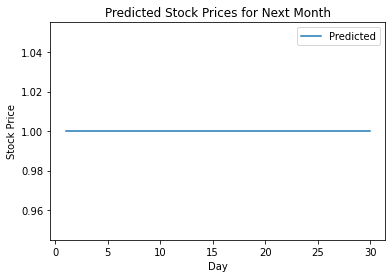

In [6]:
import numpy as np
import matplotlib.pyplot as plt

# Convert the predictions to a pandas DataFrame
next_month_predictions_df = pd.DataFrame(next_month_predictions, columns=['Predicted Stock Prices'])

# Plot the predicted stock prices
plt.plot(np.arange(1, 31), next_month_predictions_df['Predicted Stock Prices'], label='Predicted')
plt.xlabel('Day')
plt.ylabel('Stock Price')
plt.title('Predicted Stock Prices for Next Month')
plt.legend()
plt.show()
